In [1]:
#importing necessary libraries
import os
import cv2
from glob import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [15]:
#Setting Training dir paths
train_path = r"E:\Project dataset\Train"
test_path = r"E:\Project dataset\Test"

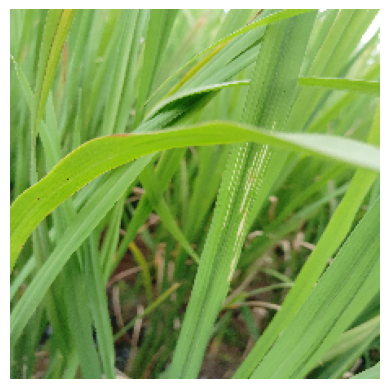

In [16]:
#Displaying the image
img = load_img("E:\\Project dataset\\Test\\312\\IMG_20240915_175606.jpg", target_size=(227, 227))
plt.imshow(img)
plt.axis("off")
plt.show()

In [17]:
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

(227, 227, 3)


In [21]:
import os

# Correct the path construction using os.path.join
file_path = os.path.join(train_path, images[i], "r0_0.jpg")
print(file_path)  # To debug and check if the path is correct

# Load the image
ax.imshow(load_img(file_path, target_size=(227, 227)))



E:\Project dataset\Train\Sonam\r0_0.jpg


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Project dataset\\Train\\Sonam\\r0_0.jpg'

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Project dataset\\TrainSonam\\r0_0.jpg'

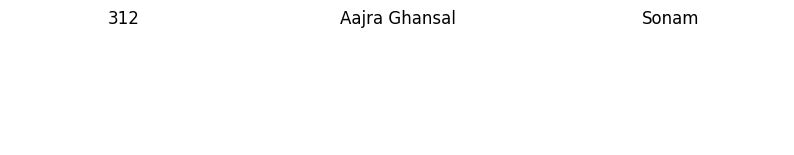

In [22]:
#Visualizing more Images from each class
images = ["312","Aajra Ghansal","Sonam"]
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
ax.imshow(load_img(train_path + images[i] + "\\r0_0.jpg", target_size=(227, 227)))


In [6]:
#Getting the count of images for each class
image_count = []
class_names = []
print('{:18s}'.format('class'), end='')
print('Count:')
print('-' * 24)
#Reading the image from each folder from training path
for folder in os.listdir(train_path):
    folder_num = len(os.listdir(os.path.join(train_path,folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)
print('-' * 24)    
print("Number of classes : ",len(class_names))

class             Count:
------------------------


NameError: name 'os' is not defined

In [7]:
#Plotting the count of images for each class
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x=class_names, y=image_count)
plt.ylabel('Number of images in each class')
plt.show()

NameError: name 'sns' is not defined

In [8]:
#Finding number of classes
className = glob(train_path + '/*')
num_classes = len(className)
print(num_classes)

NameError: name 'glob' is not defined

In [9]:
#Model using Alexnet architecture
#This model consist of 5 convolution layers followed by 3 fully connected layers. Ativation function used is relu. The network consists of a kernel or filters with size 11 x 11, 5 x 5, 3 x 3, 3 x 3 and 3 x 3 for its five convolutional layers respectively.

SyntaxError: invalid syntax (2575312910.py, line 1)

In [10]:
#Using Alexnet architecture. input is 227, 227,3 image and output is 7 classes of fruits 
model = tf.keras.models.Sequential([
    #1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #Passing it to a Fully Connected layer
    tf.keras.layers.Flatten(),
    # 1st Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),# Add Dropout to prevent overfitting
    # 2nd Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    # 3rd Fully Connected Layer
    tf.keras.layers.Dense(1000, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    #Output Layer
    tf.keras.layers.Dense(7, activation='softmax'),
    #tf.keras.layers.BatchNormalization()
])

NameError: name 'tf' is not defined

In [11]:
# plot graph
plot_model(model, to_file='fruit_classification.png')

NameError: name 'plot_model' is not defined

In [12]:
##Compiling the model
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

NameError: name 'model' is not defined

In [13]:
#Getting model's summary
model.summary()

NameError: name 'model' is not defined

In [14]:
#Specifing epochs & batch size
epochs = 40
batch_size = 16
image_height = 227
image_width = 227

In [15]:
#Creating an object of ImageDataGenerator for augmenting training dataset
train_datagen = ImageDataGenerator(rescale= 1./255,
rotation_range=10,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest')

#Creating an object of ImageDataGenerator for augmenting test dataset
test_datagen = ImageDataGenerator(rescale= 1./255)

NameError: name 'ImageDataGenerator' is not defined

In [16]:
#Generating batches of Augmented data of image size 227, 227 and batch size of 32
train_generator = train_datagen.flow_from_directory(
directory = train_path, 
target_size= (image_height, image_width), # resize to this size
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical"
)

test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size=(image_height, image_width),
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

nb_train_samples = train_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())


NameError: name 'train_datagen' is not defined

In [17]:
#Fitting the model
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=test_generator,
        verbose = 1,
        validation_steps=nb_test_samples // batch_size)

NameError: name 'model' is not defined

In [18]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

NameError: name 'plt' is not defined

In [19]:
# model evaluation
score = model.evaluate(test_generator)
print('test loss:', score[0])
print('test accuracy:', score[1])

NameError: name 'model' is not defined

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = r"E:\Dataset 2"

# Create an instance of ImageDataGenerator with a validation split
image_generator = ImageDataGenerator(
    rescale=1./255,           # Rescale pixel values to [0, 1]
    validation_split=0.2      # Set aside 20% of the data for validation
)

# Load training data
train_data_dir = image_generator.flow_from_directory(
    batch_size=32,
    directory=data_dir,
    shuffle=True,
    target_size=(299, 299),   # Resize images to 299x299
    subset="training",        # Set as training data
    class_mode='categorical'  # Use categorical mode for multi-class classification
)

# Load validation data
validation_dir = image_generator.flow_from_directory(
    batch_size=32,
    directory=data_dir,
    shuffle=True,
    target_size=(299, 299),   # Resize images to 299x299
    subset="validation",      # Set as validation data
    class_mode='categorical'  # Use categorical mode for multi-class classification
)


Found 1130 images belonging to 2 classes.
Found 281 images belonging to 2 classes.
